# Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [2]:
loandata = pd.read_csv('loan_approval_dataset.csv')
loandata.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
loandata.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

# Clean the Dataset

In [4]:
# make a new column for total assets
loandata['assets'] = loandata.residential_assets_value + loandata.commercial_assets_value + loandata.luxury_assets_value + loandata.bank_asset_value

In [5]:
# drop other assests columns
loandata.drop(columns = ['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value'], inplace = True)

In [6]:
loandata.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,assets
0,1,2,Graduate,No,9600000,29900000,12,778,Approved,50700000
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,17000000
2,3,3,Graduate,No,9100000,29700000,20,506,Rejected,57700000
3,4,3,Graduate,No,8200000,30700000,8,467,Rejected,52700000
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,55000000


In [7]:
# check for missing values
loandata.isnull().sum()

loan_id             0
no_of_dependents    0
education           0
self_employed       0
income_annum        0
loan_amount         0
loan_term           0
cibil_score         0
loan_status         0
assets              0
dtype: int64

In [8]:
# check for educaion unique values
loandata.education.unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [9]:
# remove all spaces from the education rows and convert to lowercase
loandata.education = loandata.education.str.replace(' ', '').str.lower()
loandata.education.unique()

array(['graduate', 'notgraduate'], dtype=object)

In [10]:
# convert education to numerical values 0 and 1
loandata['education'] = loandata['education'].map({'graduate': 1, 'notgraduate': 0})

In [11]:
loandata.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,assets
0,1,2,1,No,9600000,29900000,12,778,Approved,50700000
1,2,0,0,Yes,4100000,12200000,8,417,Rejected,17000000
2,3,3,1,No,9100000,29700000,20,506,Rejected,57700000
3,4,3,1,No,8200000,30700000,8,467,Rejected,52700000
4,5,5,0,Yes,9800000,24200000,20,382,Rejected,55000000


In [12]:
# chech for unique values of self_employed
loandata.self_employed.unique()

array([' No', ' Yes'], dtype=object)

In [13]:
# remove all spaces from the self_employed rows and convert to lowercase
loandata.self_employed = loandata.self_employed.str.replace(' ', '').str.lower()
loandata.self_employed.unique()

array(['no', 'yes'], dtype=object)

In [14]:
# convert self_employed to numerical values 0 and 1
loandata['self_employed'] = loandata['self_employed'].map({'yes': 1, 'no': 0})

In [15]:
loandata.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,assets
0,1,2,1,0,9600000,29900000,12,778,Approved,50700000
1,2,0,0,1,4100000,12200000,8,417,Rejected,17000000
2,3,3,1,0,9100000,29700000,20,506,Rejected,57700000
3,4,3,1,0,8200000,30700000,8,467,Rejected,52700000
4,5,5,0,1,9800000,24200000,20,382,Rejected,55000000


In [16]:
# check for unique values of loan_status
loandata.loan_status.unique()

array([' Approved', ' Rejected'], dtype=object)

In [17]:
# remove all spaces from the loan_status rows and convert to lowercase
loandata.loan_status = loandata.loan_status.str.replace(' ', '').str.lower()
loandata.loan_status.unique()

array(['approved', 'rejected'], dtype=object)

In [18]:
# convert loan_status to numerical values 0 and 1
loandata['loan_status'] = loandata['loan_status'].map({'approved': 1, 'rejected': 0})

In [19]:
loandata.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,assets
0,1,2,1,0,9600000,29900000,12,778,1,50700000
1,2,0,0,1,4100000,12200000,8,417,0,17000000
2,3,3,1,0,9100000,29700000,20,506,0,57700000
3,4,3,1,0,8200000,30700000,8,467,0,52700000
4,5,5,0,1,9800000,24200000,20,382,0,55000000


In [20]:
# remove unnecessary columns
columns_to_drop = [
    "loan_id", 
]

# columns_to_drop = [
#    "Part 1-2"
# ]

# Drop the columns
loandata.drop(columns=columns_to_drop, inplace=True)
loandata.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,assets
0,2,1,0,9600000,29900000,12,778,1,50700000
1,0,0,1,4100000,12200000,8,417,0,17000000
2,3,1,0,9100000,29700000,20,506,0,57700000
3,3,1,0,8200000,30700000,8,467,0,52700000
4,5,0,1,9800000,24200000,20,382,0,55000000


In [21]:
# re-arrenge the columns
loandata = loandata[['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'assets', 'loan_status']]
loandata.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,assets,loan_status
0,2,1,0,9600000,29900000,12,778,50700000,1
1,0,0,1,4100000,12200000,8,417,17000000,0
2,3,1,0,9100000,29700000,20,506,57700000,0
3,3,1,0,8200000,30700000,8,467,52700000,0
4,5,0,1,9800000,24200000,20,382,55000000,0


In [ ]:
# save the cleaned data
loandata.to_csv("cleaned_loan_data.csv", index=True)

print("cleaned data saved to cleaned_loan_data.csv")

# Draw charts to see patterns and relationships 

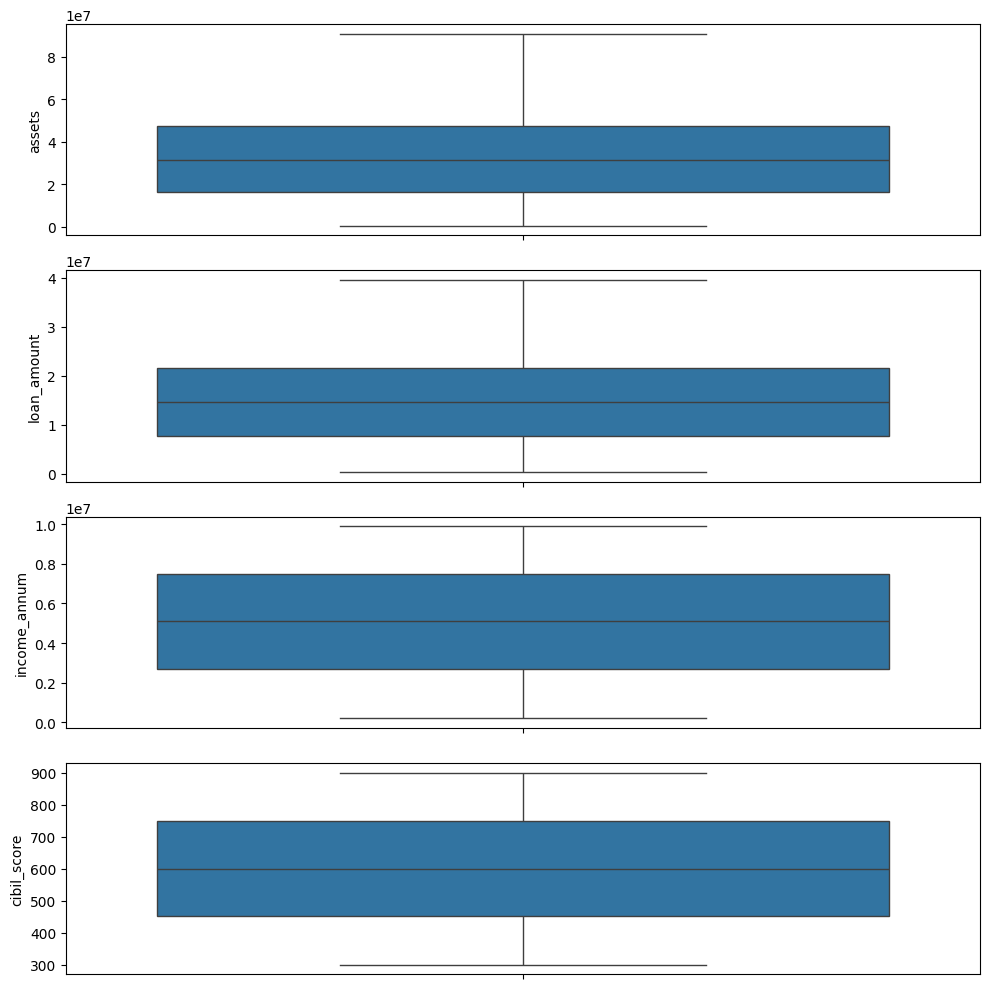

In [23]:
# Draw the pairplot to check the distribution of the data, then can idenity the outliers
fig, axs = plt.subplots(4, figsize=(10,10))
plt1 = sns.boxplot(loandata['assets'], ax = axs[0])
plt2 = sns.boxplot(loandata['loan_amount'], ax = axs[1])
plt3 = sns.boxplot(loandata['income_annum'], ax = axs[2])
plt4 = sns.boxplot(loandata['cibil_score'], ax = axs[3])

plt.tight_layout()

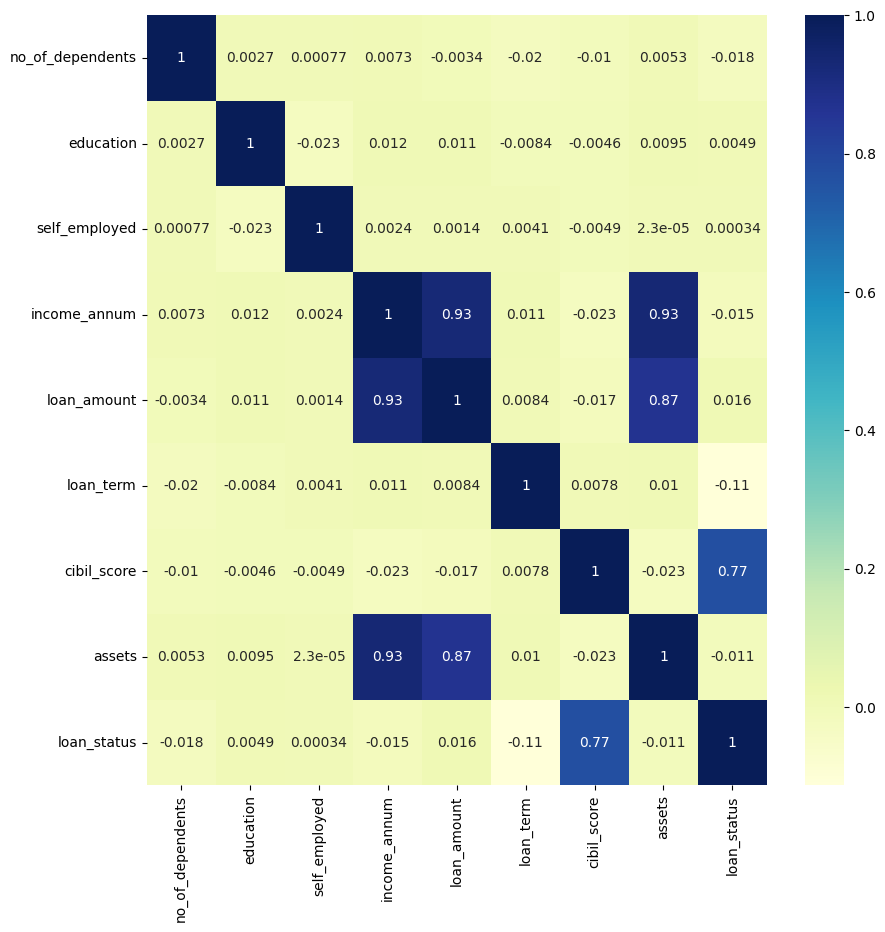

In [24]:
# draw the correlation matrix heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(loandata.corr(), cmap="YlGnBu", annot = True)
plt.show()

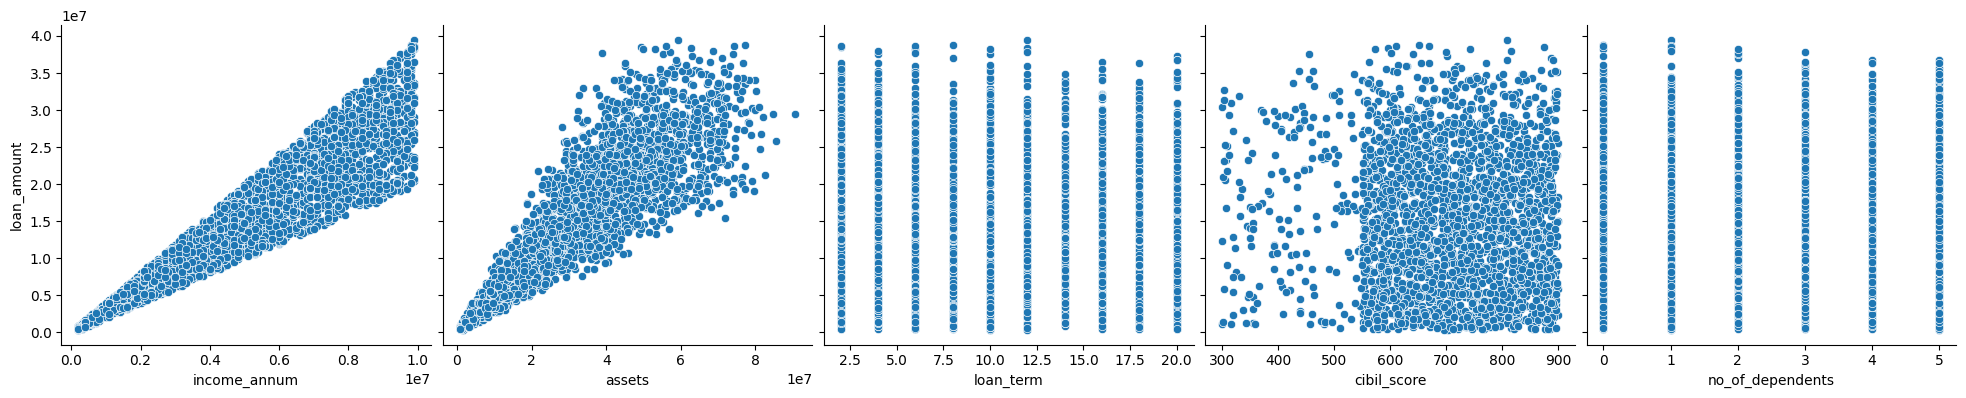

In [25]:
loandata_approved = loandata[loandata['loan_status'] == 1]
sns.pairplot(loandata_approved, x_vars=['income_annum', 'assets', 'loan_term', 'cibil_score', 'no_of_dependents'], y_vars='loan_amount', height=4, aspect=1, kind='scatter')

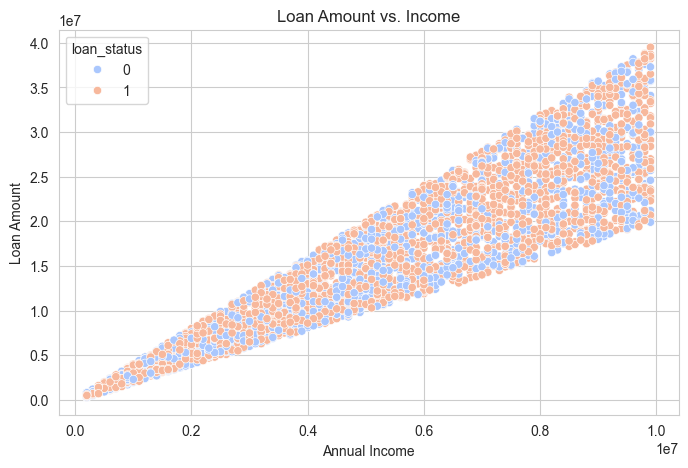

In [26]:
# Draw the pairplot for anual income, loan amount
sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))
sns.scatterplot(x=loandata["income_annum"], y=loandata["loan_amount"], hue=loandata["loan_status"], palette="coolwarm")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.title("Loan Amount vs. Income")
plt.show()

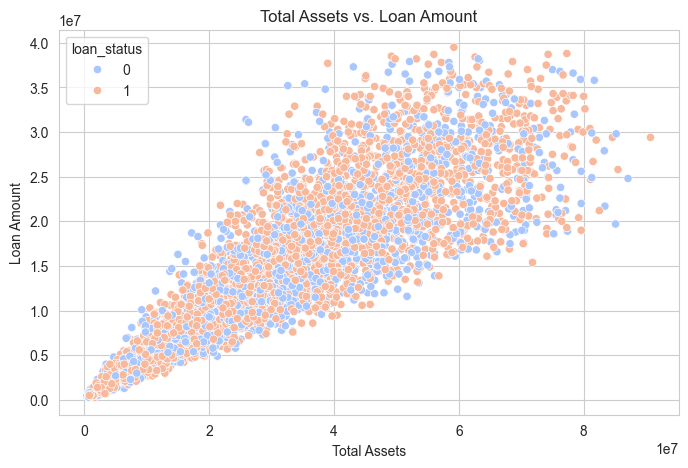

In [27]:
# Draw the pairplot for total assets, loan amount
sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))
sns.scatterplot(x=loandata["assets"], y=loandata["loan_amount"], hue=loandata["loan_status"], palette="coolwarm")
plt.xlabel("Total Assets")
plt.ylabel("Loan Amount")
plt.title("Total Assets vs. Loan Amount")
plt.show()